<h2> Stat 504 HW 2 </h2> <br>
<b> University of Idhao </b><br>
<b> Fall 2015 </b> <br>
<b> Chung Yan Wan </b><br>
<b> 10/28/2015 </b><br><br>
This assignment uses a small subset of the data from Kaggle's Yelp Business Rating Prediction competition. The data set is at https://github.com/justmarkham/DAT7/tree/master/data/yelp.csv
Description of the data: Each observation in this dataset is a review of a particular business by a particular user. The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) The "cool" column is the number of "cool" votes this particular review received from other Yelp users. There is no limit to how many "cool" votes a review can receive. The "useful" and "funny" columns are similar to the "cool" column.<br><br>
Our tasks are to create a subset of the data set which contains only the 5-stars and 1-star reviews, split the data into 2 parts, <i>train</i> and <i>test</i>, fit the <i>train</i> data set to three models, Logistic Regression, k-Nearest Neighbors, and Classification Tree, use the models to predict the star rating in the <i>test</i> data set, and finally, compare the three models in terms of their performance.  


<h4> 1. Read yelp.csv into a DataFrame </h4>

In [49]:
import pandas as pd
yelp = pd.read_csv('yelp.csv')

<h4> 2. Create a new DataFrame that only contains the 5-star and 1-star reviews </h4>

In [50]:
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

<h4> 3. Split the new DataFrame into training and testing sets, using the review text as the feature and the star rating as the response variable. </h4>

In [51]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yelp_best_worst.text, yelp_best_worst.stars, random_state=1234567)

<h4> 4. Use CountVectorizer to create document-term matrices from X_train and X_test. </h4>

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)

<h4> 5.1 Use Logistic Regression to predict the star rating </h4>

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(train_dtm, y_train)
logreg.predict(test_dtm)

array([1, 5, 5, ..., 5, 5, 5])

<h4> 5.2 Use k-Nearest Neighbors to predict the star rating </h4>

In [54]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model (using the value K=11)
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(train_dtm,y_train)
knn.predict(test_dtm)

array([5, 5, 5, ..., 5, 5, 5])

<h4> 5.3 Use Classification Tree to predict the star rating </h4>

In [55]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier()
treeclf.fit(train_dtm,y_train)
treeclf.predict(test_dtm)

array([5, 5, 5, ..., 5, 5, 5])

<h4> 5.4 Calculate the AUC for the 3 models </h4>

In [56]:
import numpy as np
from sklearn import metrics
lr_y_pred_prob = logreg.predict_proba(test_dtm)[:, 1]
y_test_binary = np.where(y_test==5, 1, 0)
print 'Logistic Regression: ', metrics.roc_auc_score(y_test_binary, lr_y_pred_prob)
knn_y_pred_prob = knn.predict_proba(test_dtm)[:, 1]
print 'k-Nearest Neighbors: ', metrics.roc_auc_score(y_test_binary, knn_y_pred_prob)
ct_y_pred_prob = treeclf.predict_proba(test_dtm)[:, 1]
print 'Classification Tree: ', metrics.roc_auc_score(y_test_binary, ct_y_pred_prob)

Logistic Regression:  0.956798686961
k-Nearest Neighbors:  0.735536059712
Classification Tree:  0.736972195627


<h4> 5.5 Plot and compare the ROC Curves for the 3 models </h4>

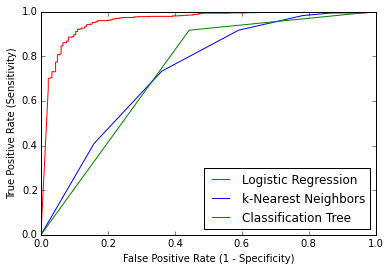

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test_binary, lr_y_pred_prob)
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test_binary, knn_y_pred_prob)
ct_fpr, ct_tpr, ct_thresholds = metrics.roc_curve(y_test_binary, ct_y_pred_prob)
plt.plot(lr_fpr, lr_tpr, 'r', label ='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, 'b', label ='k-Nearest Neighbors')
plt.plot(ct_fpr, ct_tpr, 'g', label = 'Classification Tree')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')

<h4> 6.1 Add vote types (cool/useful/funny) as an additional features into the modeling process and refit the three models to predict the star rating. </h4>

In [58]:
from sklearn.cross_validation import train_test_split
feature_columns = yelp_best_worst[['cool','useful','funny']]
X_train, X_test, y_train, y_test = train_test_split(feature_columns, yelp_best_worst.stars, random_state=1234567)

<h4> 6.2 Use Logistic Regression to predict the star rating </h4>

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
logreg.predict(X_test)

array([1, 5, 5, ..., 5, 5, 5])

<h4> 6.3 Use k-Nearest Neighbors to predict the star rating </h4>

In [60]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model (using the value K=11)
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
knn.predict(X_test)

array([1, 5, 5, ..., 5, 5, 5])

<h4> 6.4 Use Classification Tree to predict the star rating </h4>

In [61]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier()
treeclf.fit(X_train,y_train)
treeclf.predict(X_test)

array([5, 5, 5, ..., 5, 5, 5])

<h4> 6.5 Calculate the AUC for the 3 models </h4>

In [62]:
import numpy as np
from sklearn import metrics
lr_y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_test_binary = np.where(y_test==5, 1, 0)
print 'Logistic Regression: ', metrics.roc_auc_score(y_test_binary, lr_y_pred_prob)
knn_y_pred_prob = knn.predict_proba(X_test)[:, 1]
print 'k-Nearest Neighbors: ', metrics.roc_auc_score(y_test_binary, knn_y_pred_prob)
ct_y_pred_prob = treeclf.predict_proba(X_test)[:, 1]
print 'Classification Tree: ', metrics.roc_auc_score(y_test_binary, ct_y_pred_prob)

Logistic Regression:  0.674433524167
k-Nearest Neighbors:  0.651455349525
Classification Tree:  0.620387919524


<h4> 6.6 Plot and compare the ROC Curves for the 3 models </h4>

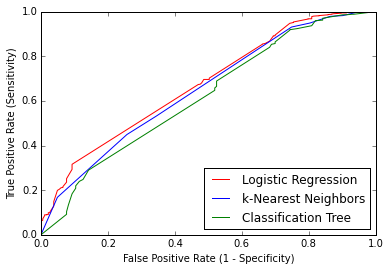

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test_binary, lr_y_pred_prob)
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test_binary, knn_y_pred_prob)
ct_fpr, ct_tpr, ct_thresholds = metrics.roc_curve(y_test_binary, ct_y_pred_prob)
plt.plot(lr_fpr, lr_tpr, 'r', label ='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, 'b', label ='k-Nearest Neighbors')
plt.plot(ct_fpr, ct_tpr, 'g', label = 'Classification Tree')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')